In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [59]:
df = pd.read_csv("./household_power_consumption.csv")
df

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
260635,260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0


In [60]:
df.dtypes

index                      int64
Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

# Thông tin các cột dữ liệu
| Tên cột                 | Mô tả                                                                  |
| ----------------------- | ---------------------------------------------------------------------- |
| Date                    | Ngày quan sát. (Kiểu: Ngày)                                            |
| Time                    | Thời gian quan sát. (Kiểu: Thời gian)                                  |
| Global\_active\_power   | Tổng công suất hoạt động tiêu thụ của hộ gia đình (kW).                |
| Global\_reactive\_power | Tổng công suất phản kháng tiêu thụ của hộ gia đình (kW).               |
| Voltage                 | Điện áp cung cấp đến hộ gia đình (V).                                  |
| Global\_intensity       | Cường độ dòng điện trung bình được cung cấp cho hộ gia đình (A).       |
| Sub\_metering\_1        | Công suất tiêu thụ của nhà bếp (kW).                                   |
| Sub\_metering\_2        | Công suất tiêu thụ của phòng giặt (kW).                                |
| Sub\_metering\_3        | Công suất tiêu thụ của bình nước nóng điện và điều hòa không khí (kW). |


In [61]:
# Gộp Date + Time thành 1 cột
df['datetime'] = df['Date'] + ' ' + df['Time']

# Sử dụng to_datetime với dayfirst=True để hỗ trợ định dạng dd/mm/yyyy hoặc dd/mm/yy
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True, errors='coerce')

# Đặt datetime làm index
df = df.set_index('datetime')

# Loại bỏ cột không cần
df = df.drop(columns=['Date', 'Time'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10868\3176763992.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True, errors='coerce')


In [62]:
df

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,,
2007-01-01 00:00:00,0,2.58,0.136,241.97,10.6,0,0,0.0
2007-01-01 00:01:00,1,2.552,0.1,241.75,10.4,0,0,0.0
2007-01-01 00:02:00,2,2.55,0.1,241.64,10.4,0,0,0.0
2007-01-01 00:03:00,3,2.55,0.1,241.71,10.4,0,0,0.0
2007-01-01 00:04:00,4,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...
2007-06-30 23:55:00,260635,2.88,0.36,239.01,12,0,0,18.0
2007-06-30 23:56:00,260636,2.892,0.358,238.86,12.2,0,0,17.0
2007-06-30 23:57:00,260637,2.882,0.28,239.05,12,0,0,18.0


In [63]:
# Ép kiểu về số thực
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [64]:
df.isnull().sum()

index                       0
Global_active_power      3771
Global_reactive_power    3771
Voltage                  3771
Global_intensity         3771
Sub_metering_1           3771
Sub_metering_2           3771
Sub_metering_3           3771
dtype: int64

In [65]:
rows_with_nan = df[df.isna().any(axis=1)]
rows_with_nan


,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,,
2007-01-14 18:36:00,19836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-28 17:13:00,39913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-22 22:58:00,76258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-22 22:59:00,76259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-25 17:52:00,120592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2007-06-09 18:30:00,230070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-06-09 18:31:00,230071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-06-19 12:14:00,244094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Đặt các giá trị thiếu bằng 0
df = df.fillna(0)

In [ ]:
agg_dict = {
    'Global_active_power': 'sum',
    'Global_reactive_power': 'sum',
    'Sub_metering_1': 'sum',
    'Sub_metering_2': 'sum',
    'Sub_metering_3': 'sum',
    'Voltage': 'mean',
    'Global_intensity': 'mean'
}

df_hourly = df.resample('H').agg(agg_dict)
df_hourly

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10868\602396085.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').agg(agg_dict)


,Global_active_power,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Voltage,Global_intensity
datetime,,,,,,,
2007-01-01 00:00:00,153.038,6.768,0.0,35.0,0.0,241.361333,10.530000
2007-01-01 01:00:00,151.404,4.298,0.0,0.0,0.0,241.096500,10.443333
2007-01-01 02:00:00,154.940,6.400,0.0,20.0,0.0,243.200167,10.540000
2007-01-01 03:00:00,152.500,5.406,0.0,16.0,0.0,243.265667,10.400000
2007-01-01 04:00:00,148.544,5.290,0.0,0.0,0.0,242.456167,10.110000
...,...,...,...,...,...,...,...
2007-06-30 19:00:00,173.234,8.140,1216.0,10.0,1054.0,239.564333,12.160000
2007-06-30 20:00:00,141.782,17.992,525.0,72.0,1052.0,239.269667,10.033333
2007-06-30 21:00:00,103.250,12.566,0.0,47.0,1039.0,239.456667,7.216667


In [83]:
power = df_hourly[['Global_active_power']].copy()
x = power['Global_active_power'].values
N = len(x)
T = 1.0  # khoảng cách giữa các mẫu = 1 giờ

In [84]:
# FFT
yf = fft(x)
xf = fftfreq(N, T)[:N // 2]
amps = 2.0 / N * np.abs(yf[0:N // 2])
amps[0] = 0  # loại bỏ tần số 0

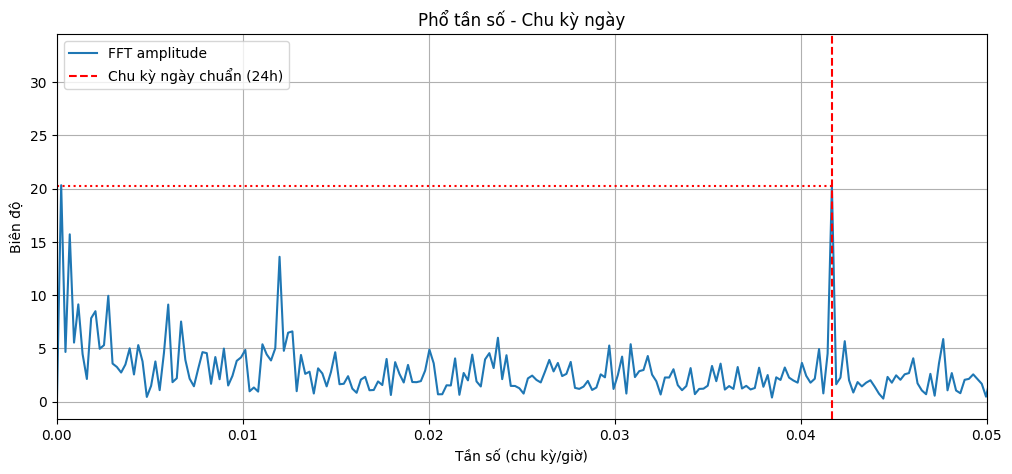

=== Chu kỳ ngày ===
Tần số gần nhất: 0.04167 chu kỳ/giờ
→ Tương ứng chu kỳ: 24.00 giờ
Biên độ tại tần số này: 20.2745


In [ ]:
# Chu kỳ ngày chuẩn
target_freq_day = 1 / 24  # ≈ 0.04167 chu kỳ/giờ

# Tìm chỉ số gần nhất với tần số này
idx_day = (np.abs(xf - target_freq_day)).argmin()

# Lấy tần số và biên độ thực tế
real_freq_day = xf[idx_day]
real_amp_day = amps[idx_day]
real_period_day = 1 / real_freq_day

# Vẽ phổ tần số
plt.figure(figsize=(12, 5))
plt.plot(xf, amps, label='FFT amplitude')

# Gióng dọc và ngang tại chu kỳ ngày chuẩn
plt.axvline(x=target_freq_day, color='red', linestyle='--', label='Chu kỳ ngày chuẩn (24h)')
plt.hlines(y=amps[idx_day], xmin=0, xmax=target_freq_day, color='red', linestyle=':')

plt.title("Phổ tần số - Chu kỳ ngày")
plt.xlabel("Tần số (chu kỳ/giờ)")
plt.ylabel("Biên độ")
plt.xlim(0, 0.05)
plt.grid()
plt.legend()
plt.show()

# In kết quả
print("=== Chu kỳ ngày ===")
print(f"Tần số gần nhất: {real_freq_day:.5f} chu kỳ/giờ")
print(f"→ Tương ứng chu kỳ: {real_period_day:.2f} giờ")
print(f"Biên độ tại tần số này: {real_amp_day:.4f}")


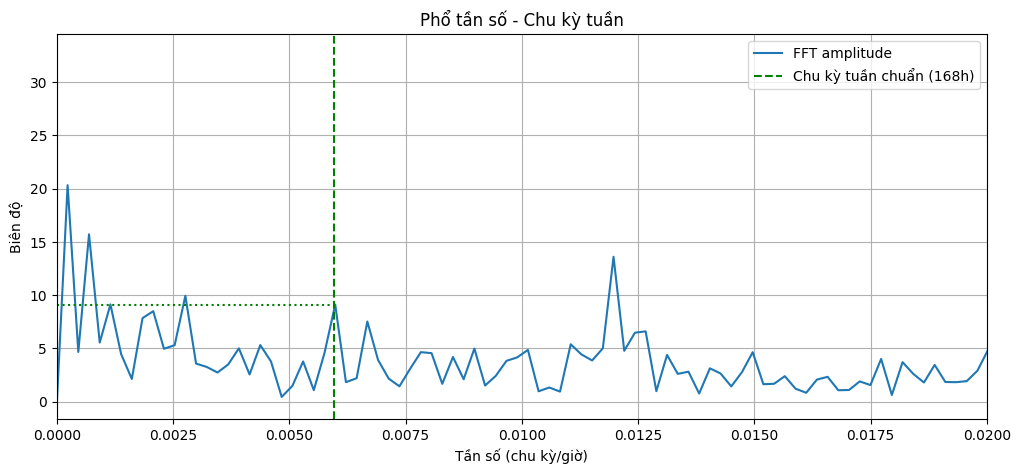

=== Chu kỳ tuần ===
Tần số gần nhất: 0.00599 chu kỳ/giờ
→ Tương ứng chu kỳ: 167.08 giờ (~6.96 ngày)
Biên độ tại tần số này: 9.1144


In [96]:
# Tần số cho chu kỳ tuần
target_freq_week = 1 / 168

# Tìm chỉ số gần nhất
idx_week = (np.abs(xf - target_freq_week)).argmin()
real_freq_week = xf[idx_week]
real_amp_week = amps[idx_week]
real_period_week = 1 / real_freq_week

# Vẽ phổ tần số và đánh dấu chu kỳ tuần
plt.figure(figsize=(12, 5))
plt.plot(xf, amps, label='FFT amplitude')

# Gióng dọc và ngang tại chu kỳ tuần chuẩn
plt.axvline(x=target_freq_week, color='green', linestyle='--', label='Chu kỳ tuần chuẩn (168h)')
plt.hlines(y=real_amp_week, xmin=0, xmax=real_freq_week, color='green', linestyle=':')

plt.title("Phổ tần số - Chu kỳ tuần")
plt.xlabel("Tần số (chu kỳ/giờ)")
plt.ylabel("Biên độ")
plt.xlim(0, 0.02)
plt.grid()
plt.legend()
plt.show()

# In kết quả
print("=== Chu kỳ tuần ===")
print(f"Tần số gần nhất: {real_freq_week:.5f} chu kỳ/giờ")
print(f"→ Tương ứng chu kỳ: {real_period_week:.2f} giờ (~{real_period_week/24:.2f} ngày)")
print(f"Biên độ tại tần số này: {real_amp_week:.4f}")


In [99]:
# Xác định chu kỳ chiếm ưu thế
dominant_idx = np.argmax(amps)
dominant_freq = xf[dominant_idx]
dominant_amp = amps[dominant_idx]
dominant_period = 1 / dominant_freq  # đơn vị: giờ

# In kết quả
print(f"Chu kỳ chiếm ưu thế trong dữ liệu: {dominant_period:.2f} giờ")

Chu kỳ chiếm ưu thế trong dữ liệu: 12.00 giờ


<Figure size 1000x500 with 0 Axes>

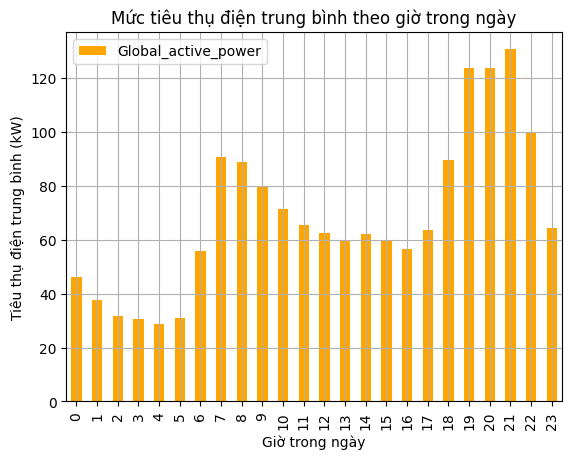

Giờ tiêu thụ điện cao nhất trung bình: 21:00


In [88]:
# Trung bình tiêu thụ theo giờ trong ngày
avg_power_by_hour = power.groupby(power.index.hour).mean()

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
avg_power_by_hour.plot(kind='bar', color='orange')
plt.title("Mức tiêu thụ điện trung bình theo giờ trong ngày")
plt.xlabel("Giờ trong ngày")
plt.ylabel("Tiêu thụ điện trung bình (kW)")
plt.grid()
plt.show()

# Giờ tiêu thụ điện cao nhất
peak_hour = avg_power_by_hour['Global_active_power'].idxmax()
print(f"Giờ tiêu thụ điện cao nhất trung bình: {peak_hour}:00")
